In [18]:
# Import packages from Python standard library
import numpy as np
import pandas as pd
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [75]:
#Data including zeros -- switching Nan values to 0
branches = pd.read_csv('../cpl_project/can-summer-2023/data/clean/branch_metrics.csv')
#branches['COMPUTER_SESSIONS_2'] = branches['COMPUTER_SESSIONS'].fillna(0)
#branches['VISITORS_2'] = branches['VISITORS'].fillna(0)

branches_nonzero = branches[(branches['VISITORS'] > 0) & (branches['COMPUTER_SESSIONS'] > 0)]
branches_sessions = branches_nonzero.loc[(branches_nonzero['COMPUTER_SESSIONS']) >= branches_nonzero['VISITORS']]
branches_sessions

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
276,Altgeld,2021,9,171.0,818.0,162.0
277,Altgeld,2021,10,146.0,681.0,155.0
280,Altgeld,2022,1,150.0,530.0,339.0
1291,Bezazian,2020,12,4218.0,501.0,413.0
1438,Blackstone,2020,11,5961.0,589.0,140.0
2340,Chicago Bee,2022,1,799.0,589.0,512.0
2782,Clearing,2021,11,1830.0,449.0,380.0
2798,Clearing,2023,3,2101.0,611.0,610.0
3365,Douglass,2021,2,273.0,343.0,326.0
3366,Douglass,2021,3,347.0,547.0,484.0


In [ ]:
condition based extraction

## Comparsion of %'s of Computer Sessions / Visitors

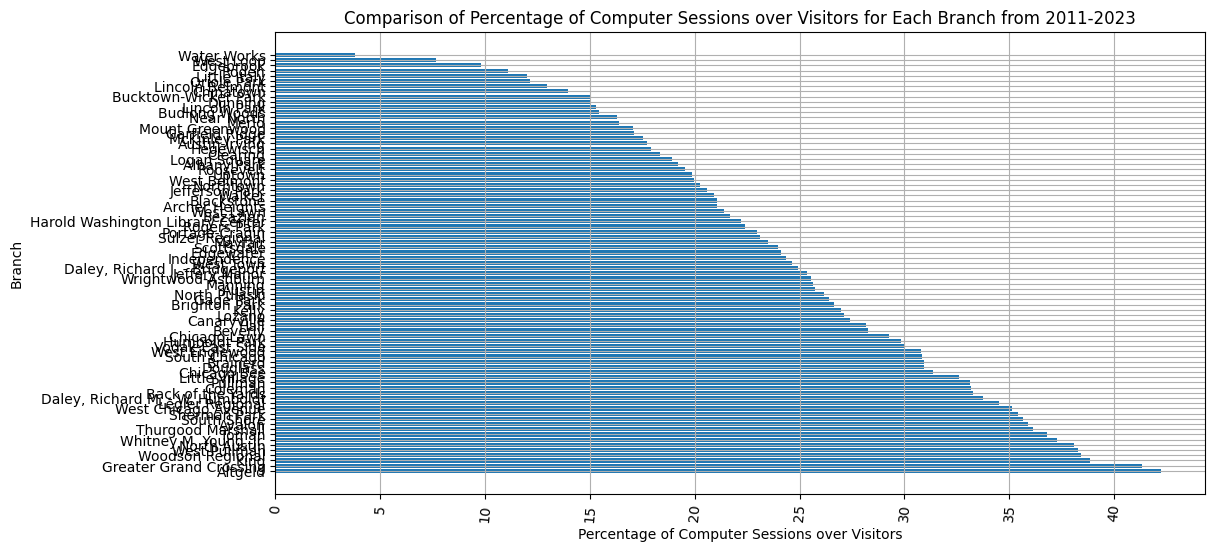

In [53]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics = branches_nonzero.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics['COMPUTER_SESSIONS'] / branch_metrics['VISITORS']) * 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

In [54]:
branch_metrics['COMPUTER_SESSION_PERCENTAGE'].sort_values(ascending=True)

BRANCH
Water Works                3.799226
West Loop                  7.677422
Edgebrook                  9.801800
Roden                     11.077799
Little Italy              11.981078
                            ...    
West Pullman              38.291806
Woodson Regional          38.443027
King                      38.875901
Greater Grand Crossing    41.339479
Altgeld                   42.244182
Name: COMPUTER_SESSION_PERCENTAGE, Length: 81, dtype: float64

In [55]:
branch_metrics['COMPUTER_SESSION_PERCENTAGE'].sort_values(ascending=True)

BRANCH
Water Works                3.799226
West Loop                  7.677422
Edgebrook                  9.801800
Roden                     11.077799
Little Italy              11.981078
                            ...    
West Pullman              38.291806
Woodson Regional          38.443027
King                      38.875901
Greater Grand Crossing    41.339479
Altgeld                   42.244182
Name: COMPUTER_SESSION_PERCENTAGE, Length: 81, dtype: float64

Explanation For Above Graph:
- This graph sums up all of the Computer Sessions and sums up the Visitors from each branch for all years.
- Then, it creates a new column that displays the values when dividing (sum of Computer Sessions/sum of Visitors)*100 and sorts them from greatest to least

## New Dataframe

In [81]:
# New Dataframe with all branches that includes the "Computer Session Percentage" column
branches_cp = branches_nonzero
branches_cp['COMPUTER_SESSIONS_PERCENTAGE'] = (branches['COMPUTER_SESSIONS'] / branches['VISITORS']) * 100
#branches_cp_sorted = branches_cp.sort_values('COMPUTER_SESSIONS_PERCENTAGE', ascending=False)
#branches_cp_sorted

/tmp/ipykernel_447228/1173602097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branches_cp['COMPUTER_SESSIONS_PERCENTAGE'] = (branches['COMPUTER_SESSIONS'] / branches['VISITORS']) * 100


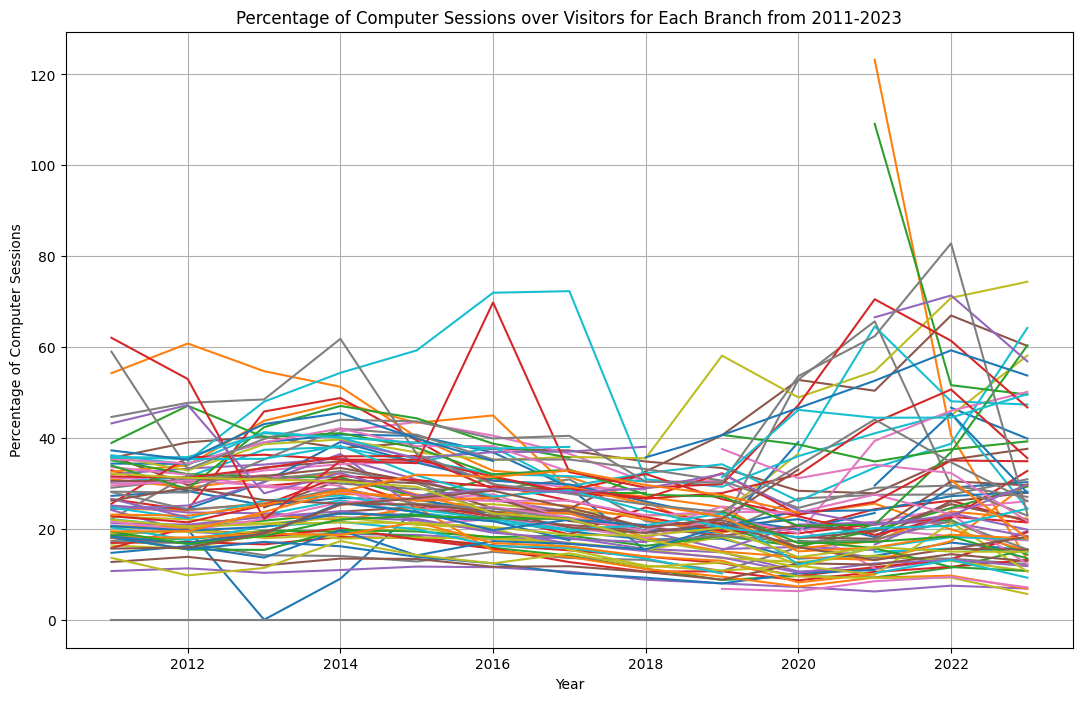

YEAR,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
BRANCH,,,,,,,,,,,,,
Albany Park,18.718955,19.839121,NaN,18.056851,24.469622,23.611334,19.406291,17.659996,17.845957,13.453645,14.050112,16.982809,15.224020
Altgeld,54.250325,60.783693,54.696861,51.254176,40.180963,32.779514,31.370440,25.887004,18.694154,11.021406,123.233484,40.564863,13.180297
Archer Heights,20.305306,20.261588,21.801247,23.340873,23.133334,22.047970,22.320893,19.659410,20.198052,15.957388,21.045193,21.957706,14.292885
Austin,32.891096,28.355370,29.393757,30.898534,25.291662,22.746261,18.756047,24.730020,20.925713,19.879473,24.330507,26.191972,21.626460
Austin-Irving,24.140841,19.373199,18.487120,18.851879,18.665779,17.703548,18.038628,15.580109,14.836520,10.615170,11.131880,13.329160,19.539767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Pullman,58.981343,33.154235,39.786300,44.009066,43.638065,39.887099,40.465509,30.379401,30.149196,53.618032,62.390908,82.815407,23.252932
West Town,32.137591,31.232243,30.865797,30.439030,29.242515,23.384325,22.153014,17.556509,14.786045,11.566752,15.996684,14.995500,14.926241
"Whitney M. Young, Jr.",35.659472,35.780763,41.042184,40.103357,38.941054,37.684513,38.035241,NaN,31.379630,46.183916,44.451550,44.477503,49.644721


In [80]:
branches_groupby = branches_cp.groupby(['BRANCH', 'YEAR'])['COMPUTER_SESSIONS_PERCENTAGE'].mean().unstack()
plt.figure(figsize=(13, 8))
for branch in branch_cp.index:
    plt.plot(branch_cp.columns, branch_cp.loc[branch], label=branch)
plt.xlabel('Year')
plt.ylabel('Percentage of Computer Sessions')
plt.title('Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
#plt.legend()
plt.grid(True)
plt.show()
branches_groupby

Explanation For Above Graph:
- First, I created a new DataFrame that includes an additional column for the Computer Session Percentage
- Then, it plots those percentages for all branches
- Atgeld is the orange line

In [23]:
branches['DATE'] = pd.to_datetime(branches[['YEAR', 'MONTH']].assign(DAY=1))

monthly_visitors_nonzero = branches.groupby('DATE')['VISITORS'].mean()

- playinga round with 0 vs non zeo
- try plotting Altgeld month by month (over 100%)
- check visitors counts to see if they were low
- generate average for all branches, and compare that average to indivdual branches